Name: Joshua Kristanto & Maria Verna Aquino


Reading the origninal Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("train2.csv")

data.drop(columns="Id")
X = data.iloc[:,1:78]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index

#print(corrmat)
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [2]:
def scat(x,y,title, xlabel, ylabel):
    plt.scatter(x, y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def heat(data):
    corrmat = data.corr()
    top_corr_features = corrmat.index

    #print(corrmat)
    plt.figure(figsize=(20,20))

    #plot heat map
    g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
    
def droprow(data,atb, value):
#     print('TEST')
    value = data[atb] >value
#     value = value.drop(value.index[1])
#     data = data.drop(data.index[1])
    k = -1
    for i in value:
        k = k+1
        if (i == True):
            value = value.drop(value.index[k])
            #print(data.iloc[k,4])
            data = data.drop(data.index[k])
            k = k -1
            #print(k)

In [3]:
house = data.copy()

house = house.drop(columns= "Id")
house = house.drop(columns = "SalePrice")
#house.drop(columns = "GarageYrGrd")
house = house.drop(columns = "GarageYrBlt")
house = house.drop(columns = "GarageCars")
house = house.drop(columns = "GrLivArea")
house = house.drop(columns = "TotRmsAbvGrd")
house = house.drop(columns = "1stFlrSF")
house = house.drop(columns = "2ndFlrSF")
house = house.drop(columns = "OverallQual")
house = house.drop(columns = "Neighborhood")
house = house.drop(columns = "Utilities")
house = house.drop(columns ="MiscFeature")
house = house.drop(columns ="BsmtUnfSF")
house = house.drop(columns ="BsmtFinSF1")
house = house.drop(columns ="YearRemodAdd")
house = house.drop(columns ="YearBuilt")

#obj = house.select_dtypes(include=['object']).copy()

#drop all the object data types
house = house.drop(columns = list(house.select_dtypes(include=['object'])))
for column in house:
    house[column].fillna(house[column].mode()[0], inplace=True)
house2 = house.copy()
house['MSZoning'] = data["MSZoning"]
house['HeatingQC'] = data["HeatingQC"]
house['MSZoning'].fillna(house['MSZoning'].mode()[0], inplace=True)
house['HeatingQC'].fillna(house['HeatingQC'].mode()[0], inplace=True)

#label encoding
house['HeatingQC'] = house['HeatingQC'].astype('category')
house['HeatingQC'] = house['HeatingQC'].cat.codes


#one-hot encoding
house = pd.get_dummies(house, columns=['MSZoning'], prefix = ['MSZ'])
house = house.drop(columns ="MSZ_RL")
house = house.drop(columns = "MSZ_RM")
house


#list(house.select_dtypes(include=['object']))
# #print(obj.dtypes)

# for col in obj:
#     obj[col] = obj[col].astype('category')
    
# for column in obj:
#     obj[column] = obj[column].cat.codes

# #print(obj)

# X=np.array(obj)
# Y=np.array(data["SalePrice"])

# #Model
# from sklearn.model_selection import train_test_split
# XTRAIN, XTEST, YTRAIN, YTEST= train_test_split(X,Y)

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# r=LinearRegression().fit(XTRAIN,YTRAIN)

# print(r.intercept_)
# print(r.coef_)


# #Prediction
# P=r.predict(XTEST)
# R2=r2_score(YTEST,P)
# MSE = mean_squared_error(YTEST,P)
# print(R2,MSE)


,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HeatingQC,MSZ_C (all),MSZ_FV,MSZ_RH
0,60,65.0,8450,5,196.0,0,856,0,1,0,...,0,0,0,0,2,2008,0,0,0,0
1,20,80.0,9600,8,0.0,0,1262,0,0,1,...,0,0,0,0,5,2007,0,0,0,0
2,60,68.0,11250,5,162.0,0,920,0,1,0,...,0,0,0,0,9,2008,0,0,0,0
3,70,60.0,9550,5,0.0,0,756,0,1,0,...,0,0,0,0,2,2006,2,0,0,0
4,60,84.0,14260,5,350.0,0,1145,0,1,0,...,0,0,0,0,12,2008,0,0,0,0
5,50,85.0,14115,5,0.0,0,796,0,1,0,...,320,0,0,700,10,2009,0,0,0,0
6,20,75.0,10084,5,186.0,0,1686,0,1,0,...,0,0,0,0,8,2007,0,0,0,0
7,60,60.0,10382,6,240.0,32,1107,0,1,0,...,0,0,0,350,11,2009,0,0,0,0
8,50,51.0,6120,5,0.0,0,952,0,0,0,...,0,0,0,0,4,2008,2,0,0,0
9,190,50.0,7420,6,0.0,0,991,0,1,0,...,0,0,0,0,1,2008,0,0,0,0


Attempted to make PCA

In [4]:
X=np.array(house2)
Y=np.array(data["SalePrice"])
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
print(pca.components_)

[[-5.92814053e-04  6.30360858e-04  9.99918417e-01 -6.38892409e-07
   1.87484122e-03  1.79761355e-03  1.14865000e-02  2.31522997e-05
   8.22958535e-06  1.14900087e-06  6.96608654e-06  7.18174599e-07
   9.78298191e-06 -3.93374933e-07  1.75360690e-05  3.87080418e-03
   2.15768213e-03  5.63610612e-04 -1.12663740e-04  6.00337563e-05
   2.41348159e-04  3.12885412e-04  1.89575925e-03  3.28644419e-07
  -1.89825070e-06]
 [ 1.97511587e-03 -2.91097680e-03 -2.40696830e-05  2.08730987e-04
  -3.38466700e-02 -2.42955011e-03 -1.36136795e-01  2.55573496e-04
  -6.81340253e-05 -3.47501191e-06 -7.27963248e-05  7.99183833e-07
  -2.10943520e-06  3.19548811e-05 -6.35219195e-05 -4.81533827e-02
  -1.19119034e-02 -7.44384794e-03  4.23482699e-03 -2.97859566e-04
   2.22303374e-03  1.00895882e-03  9.88818859e-01 -4.69756861e-05
   1.94354881e-05]]


Made an initial Attempt on making a Linear Regression

In [5]:

X=np.array(house)
Y=np.array(data["SalePrice"])
#Model
from sklearn.model_selection import train_test_split
XTRAIN, XTEST, YTRAIN, YTEST= train_test_split(X,Y)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
r=LinearRegression().fit(XTRAIN,YTRAIN)

print(r.intercept_)
print(r.coef_)


#Prediction
P=r.predict(XTEST)
R2=r2_score(YTEST,P)
MSE = mean_squared_error(YTEST,P)
print(R2,MSE)


-769969.2606368468
[-1.55285448e+00  2.91193154e+02  3.83540566e-01  6.42157982e+03
  4.95172196e+01 -1.55341939e+01  5.77993663e+01 -5.82193642e+00
  1.05875084e+04 -7.51480384e+03  3.61149457e+04  2.57729215e+04
 -3.83530705e+03 -2.01546017e+04  1.61159516e+04  7.32981059e+01
  3.67224881e+01  2.20660179e+01  1.72785498e+01  1.31835227e+01
  3.87193721e+01  1.27381875e+02 -8.83713605e+00  8.92874581e+01
  3.71209087e+02 -5.37618364e+03 -2.91020689e+04  1.82132093e+03
  6.43571613e+03]
0.5475622345270964 2938723690.939156


Calculates the regression of the current data

In [6]:
from sklearn.feature_selection import f_regression

f_regression(X,Y, center=True)

(array([1.04314661e+01, 1.77236963e+02, 1.09090355e+02, 8.89162260e+00,
        4.19328468e+02, 1.88779522e-01, 8.80341282e+02, 9.56599754e-01,
        7.93009124e+01, 4.13789231e-01, 6.68430296e+02, 1.28018964e+02,
        4.24564124e+01, 2.74372340e+01, 4.06503866e+02, 9.26951287e+02,
        1.71494673e+02, 1.61577391e+02, 2.45092751e+01, 2.90384327e+00,
        1.83365999e+01, 1.25562207e+01, 6.54933564e-01, 3.15017168e+00,
        1.22066133e+00, 2.78007890e+02, 1.82733518e+01, 1.18928325e+01,
        6.26852241e+00]),
 array([1.26647168e-003, 3.01296843e-038, 1.12313915e-024, 2.91235127e-003,
        4.10046104e-082, 6.63998651e-001, 9.48422939e-152, 3.28207310e-001,
        1.55034414e-018, 5.20153636e-001, 1.23647007e-121, 1.65047340e-028,
        9.92749733e-011, 1.86042603e-007, 6.14148746e-080, 5.26503817e-158,
        3.97221654e-037, 3.49337362e-035, 8.25577048e-007, 8.85817036e-002,
        1.97214002e-005, 4.07348960e-004, 4.18486349e-001, 7.61275785e-002,
        2.6941

Creates a Heatmap of the correlations that may have a high correlation  between the correlation

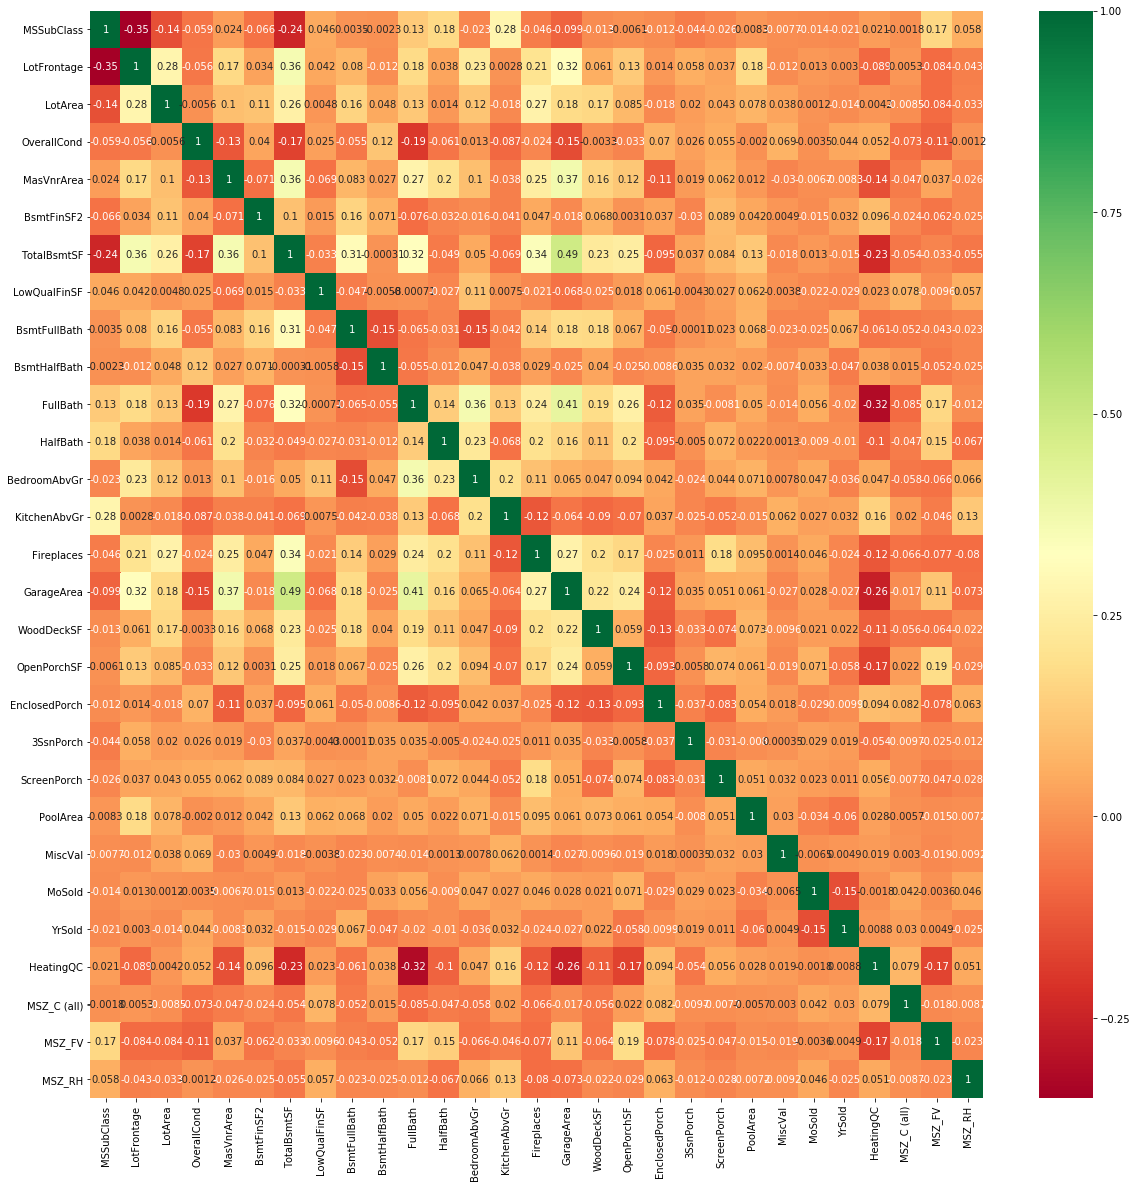

In [7]:
#get correlations of each features in dataset
corrmat = house.corr()
top_corr_features = corrmat.index

#print(corrmat)
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
house

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,BsmtFinSF2,TotalBsmtSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HeatingQC,MSZ_C (all),MSZ_FV,MSZ_RH
0,60,65.0,8450,5,196.0,0,856,0,1,0,...,0,0,0,0,2,2008,0,0,0,0
1,20,80.0,9600,8,0.0,0,1262,0,0,1,...,0,0,0,0,5,2007,0,0,0,0
2,60,68.0,11250,5,162.0,0,920,0,1,0,...,0,0,0,0,9,2008,0,0,0,0
3,70,60.0,9550,5,0.0,0,756,0,1,0,...,0,0,0,0,2,2006,2,0,0,0
4,60,84.0,14260,5,350.0,0,1145,0,1,0,...,0,0,0,0,12,2008,0,0,0,0
5,50,85.0,14115,5,0.0,0,796,0,1,0,...,320,0,0,700,10,2009,0,0,0,0
6,20,75.0,10084,5,186.0,0,1686,0,1,0,...,0,0,0,0,8,2007,0,0,0,0
7,60,60.0,10382,6,240.0,32,1107,0,1,0,...,0,0,0,350,11,2009,0,0,0,0
8,50,51.0,6120,5,0.0,0,952,0,0,0,...,0,0,0,0,4,2008,2,0,0,0
9,190,50.0,7420,6,0.0,0,991,0,1,0,...,0,0,0,0,1,2008,0,0,0,0


Creates a Model for Multiple Linear Regression

In [9]:
X=np.array(house)
Y=np.array(data["SalePrice"])

#Model
from sklearn.model_selection import train_test_split
XTRAIN, XTEST, YTRAIN, YTEST= train_test_split(X,Y)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
r=LinearRegression().fit(XTRAIN,YTRAIN)

print(r.intercept_)
print(r.coef_)


#Prediction
P=r.predict(XTEST)
R2=r2_score(YTEST,P)
MSE = mean_squared_error(YTEST,P)
print(R2,MSE)

2132622.9330179575
[-6.34822672e+01  9.34814149e+01  3.68898687e-01  5.57205035e+03
  6.75710687e+01 -7.41905110e+00  4.35190511e+01  1.83066950e+01
  1.23452958e+04  5.96949134e+02  4.17371756e+04  2.41823826e+04
 -2.05579742e+03 -2.40644735e+04  1.45802479e+04  7.13728197e+01
  4.98600614e+01  5.79795278e+01  2.96476407e+01  3.87816634e+01
  5.51754251e+01 -1.36085122e+02 -3.85131413e+00  2.03635692e+02
 -1.06334700e+03 -5.20933630e+03 -2.67461132e+04  5.76210385e+03
  1.24114654e+04]
0.6487639302011893 2140374686.4091794


Y = 331786.7488635648 -1.48590695e+02*MSSubClass +  4.01142085e+01*LotFrontage  +   4.66514078e-01*LotArea +  5.63072269e+03*OverallCond  +  3.54609080e+02*YearBuilt  +  3.25629555e+02*YearRemodAdd + 5.39628498e+01*MasVnrArea +  1.83032626e+01*BsmtFinSF1 + 8.85931922e+00*BsmtFinSF2 +  1.20261382e+01*BsmtUnfSF + 3.91887200e+01*TotalBsmtSF +  5.28609977e+01*2ndFlrSF + 6.40048597e+01*LowQualFinSF + 9.25289616e+03*BsmtFullBath -  1.17146487e+03*BsmtHalfBath + 1.78876891e+04*FullBath  +  2.64967667e+02*HalfBath  - 6.41496000e+03*BedroomAbvGr + 1.25863427e+04*KitchenAbvGr + 6.47219056e+01*Fireplaces +  3.32184720e+01*GarageArea + 2.83615510e+01*WoodDeckSF + 4.25150175e+01*OpenPorchSF +  2.64342507e+01*EnclosedPorch + 4.33443819e+01*3SsnPorch + -3.12835050e+01 *ScreenPorch + -3.65829932e+00 *PoolArea + 7.92522902e+02 * MiscVal + -8.28835866e+02 * MoSold + -8.28835866e+02 * YrSold + --2.79822260e+03 * HeatingQC + -3.03369581e+04*MSZ_C (all) + 3.39455129e+02* MSZ_FV + 4.37312608e+03* MSZ_RH + 6.48610807e+03 *MSZ_RL

Reads test.csv file and Deletes Variables that we thought that we didn't need

In [10]:
traindata = pd.read_csv("test2.csv")

train = traindata.copy()

train = train.drop(columns= "Id")
#house.drop(columns = "GarageYrGrd")
train = train.drop(columns = "GarageYrBlt")
train = train.drop(columns = "GarageCars")
train = train.drop(columns = "GrLivArea")
train = train.drop(columns = "TotRmsAbvGrd")
train = train.drop(columns = "1stFlrSF")
train = train.drop(columns = "2ndFlrSF")
train = train.drop(columns = "OverallQual")
train = train.drop(columns = "Neighborhood")
train = train.drop(columns = "Utilities")
train = train.drop(columns ="MiscFeature")
train = train.drop(columns ="BsmtUnfSF")
train = train.drop(columns ="BsmtFinSF1")
train = train.drop(columns ="YearRemodAdd")
train = train.drop(columns ="YearBuilt")
#obj = house.select_dtypes(include=['object']).copy()

#drop all the object data types
train = train.drop(columns = list(train.select_dtypes(include=['object'])))
for column in train:
    train[column].fillna(train[column].mode()[0], inplace=True)

train['MSZoning'] = traindata["MSZoning"]
train['HeatingQC'] = traindata["HeatingQC"]

train['MSZoning'].fillna(train['MSZoning'].mode()[0], inplace=True)
train['HeatingQC'].fillna(train['HeatingQC'].mode()[0], inplace=True)
# #label encoding
train['HeatingQC'] = train['HeatingQC'].astype('category')
train['HeatingQC'] = train['HeatingQC'].cat.codes
train = pd.get_dummies(train, columns=['MSZoning'], prefix = ['MSZ'])
train = train.drop(columns ="MSZ_RL") 
train = train.drop(columns = "MSZ_RM")

# # #one-hot encoding
# train = pd.get_dummies(train, columns=['MSZoning'], prefix = ['MSZ'])
# train = train.drop(columns = "MSZ_RM")
train
x=np.array(train)


Makes the prediction from the Linear Regression

In [11]:
#Model
from sklearn.model_selection import train_test_split
#XTRAIN, XTEST, YTRAIN, YTEST= train_test_split(X,Y)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#r=LinearRegression().fit(XTRAIN,YTRAIN)

#print(r.intercept_)
#print(r.coef_)


#Prediction
train
P=r.predict(x)
# R2=r2_score(YTEST,P)
# MSE = mean_squared_error(YTEST,P)
# print(R2,MSE)
print(np.array(traindata["Id"]),P);

[1461 1462 1463 ... 2917 2918 2919] [148600.08313324 117308.99830531 200892.62856765 ... 215838.05769713
  67188.58741375 236659.69520958]


Creates the Result.csv

In [12]:
df = pd.DataFrame({"Id":np.array(traindata["Id"]),
                  "SalePrice": P})
df.to_csv("result.csv", sep =",",index = False)


Team Name: Team CSUNACM Place:4427  Score .44756